<a href="https://colab.research.google.com/github/csharpshooter/EIP/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


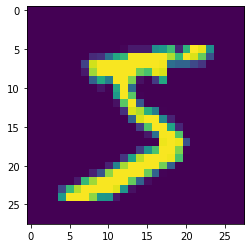

In [8]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [13]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [135]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(256, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2))
model.add(Convolution2D(512, 3, 3, activation='relu'))

model.add(Convolution2D(10, 11))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  import sys


In [136]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 11, 11, 512)       1180160   
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 1, 1, 10)          619530    
_________________________________________________________________
flatten_28 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_28 (Activation)   (None, 10)                0         
Total params: 1,802,250
Trainable params: 1,802,250
Non-trainable params: 0
___________________________________________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [138]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 45s 742us/step - loss: 0.0955 - acc: 0.9706
Epoch 2/10
60000/60000 [==============================] - 43s 719us/step - loss: 0.0359 - acc: 0.9888
Epoch 3/10
60000/60000 [==============================] - 43s 719us/step - loss: 0.0223 - acc: 0.9925
Epoch 4/10
60000/60000 [==============================] - 43s 718us/step - loss: 0.0142 - acc: 0.9954
Epoch 5/10
60000/60000 [==============================] - 43s 718us/step - loss: 0.0127 - acc: 0.9960
Epoch 6/10
60000/60000 [==============================] - 43s 716us/step - loss: 0.0084 - acc: 0.9975
Epoch 7/10
60000/60000 [==============================] - 43s 716us/step - loss: 0.0079 - acc: 0.9975
Epoch 8/10
60000/60000 [==============================] - 43s 716us/step - loss: 0.0068 - acc: 0.9980
Epoch 9/10
60000/60000 [==============================] - 43s 717us/step - loss: 0.0060 - acc: 0.9981
Epoch 10/10
60000/60000 [==============================] - 43s 718us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [140]:
print(score)

[0.060999790370383014, 0.9907]


In [0]:
y_pred = model.predict(X_test)

In [142]:
print(y_pred[:9])
print(y_test[:9])

[[1.5600358e-17 2.4770960e-27 1.7433091e-17 2.5561499e-17 3.3353909e-30
  2.9353502e-25 4.0195633e-32 1.0000000e+00 4.5145069e-18 3.0414260e-17]
 [3.6296159e-16 1.8370217e-17 1.0000000e+00 3.8184244e-19 3.1340154e-22
  1.4028203e-32 2.9347683e-17 5.2733352e-29 8.4216852e-22 1.2903623e-26]
 [6.2743059e-17 1.0000000e+00 9.9798696e-14 2.0145071e-15 1.5954086e-09
  8.8212125e-13 5.4770980e-14 8.1325377e-11 3.3552128e-09 4.7966663e-14]
 [1.0000000e+00 6.7113913e-27 1.0995662e-18 8.0367988e-21 2.7818094e-23
  7.0865823e-21 3.6298356e-17 3.4598562e-21 1.0122393e-15 5.3927078e-14]
 [9.6662324e-15 2.0782690e-18 3.2180577e-14 3.5979948e-22 1.0000000e+00
  2.2829336e-17 1.1691262e-17 5.5647865e-20 2.4514961e-14 6.7117366e-12]
 [5.4813662e-16 1.0000000e+00 3.4339404e-13 3.2472520e-18 9.3113156e-10
  6.7347126e-17 2.6905997e-17 1.0770909e-09 8.2810754e-09 9.5279816e-14]
 [5.3600641e-24 5.3546670e-17 1.5625657e-16 1.9340344e-25 9.9996436e-01
  1.2833619e-16 4.6815913e-24 6.8007326e-20 3.5698711e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_107'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()